# Policy Iteration

In [ ]:
!pip install gym
!pip install numpy==1.23.5

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print('Load Packages')

Load Packages


# FrozenLake

In [ ]:
env = gym.make('FrozenLake8x8-v1', render_mode="rgb_array")

obs_space = env.observation_space
n_state = obs_space.n
print('Observation space')
print("Total {} states".format(n_state))

act_space = env.action_space
n_act = act_space.n
print('Action space')
print("Total {} actions".format(n_act))

Observation space
Total 64 states
Action space
Total 4 actions


/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


# Define functions step by step

### Initial Policy $\pi_{0}(\cdot|s)$

Initial Policy Distribution:



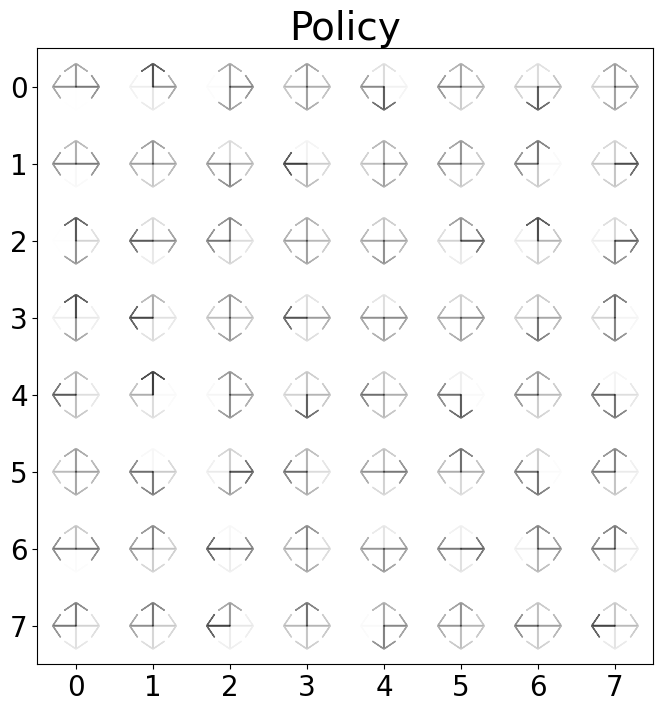

In [ ]:
def plot_policy(policy,fig_title="Policy"):
    fig= plt.figure(figsize=(8,8))
    ax = plt.axes()
    ax.set_xticks(list(range(8)))
    ax.set_yticks(list(range(8)))
    plt.imshow(np.ones((8,8,3)))
    plt.title(fig_title,fontdict={'fontsize':28})
    arr_len = 0.2
    for i in range(8):
        for j in range(8):
            s = i*8+j
            if policy[s][0]> 0:
                plt.arrow(j,i,-arr_len,0,color="k",alpha=policy[s][0],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
            if policy[s][1]> 0:
                plt.arrow(j,i,0,arr_len,color="k",alpha=policy[s][1],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
            if policy[s][2]> 0:
                plt.arrow(j,i,arr_len,0,color="k",alpha=policy[s][2],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
            if policy[s][3]> 0:
                plt.arrow(j,i,0,-arr_len,color="k",alpha=policy[s][3],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    plt.show()

policy = np.random.uniform(size=(n_state,n_act)) # sample random number between 0 and 1
policy = policy/np.sum(policy,axis=1,keepdims=True) # make it sum to 1
# np.sum(policy,axis=1) -> shape: (n_state,)
# np.sum(policy,axis=1,keepdims=True) -> shape: (n_state,1)
# shape: (n_state,n_act) / shape: (n_state,1)
# shape: (n_state,n_act) / shape: (n_state,1 x n_act) (broadcasting)

np.set_printoptions(precision=3,suppress=True)
print("Initial Policy Distribution:\n")
plot_policy(policy)

## Policy Evaluation

In this step, value function for fixed policy $\pi$ is computed.
We will mainly use Bellman expectation equation for $V_{\pi}$:

$V_{\pi}(s)=\sum_{a}\pi(a|s)\sum_{s'}[r(s,a,s')+\gamma V_{\pi}(s')]P(s'|s,a)$

Policy evaluation for random policy

Value of current policy:


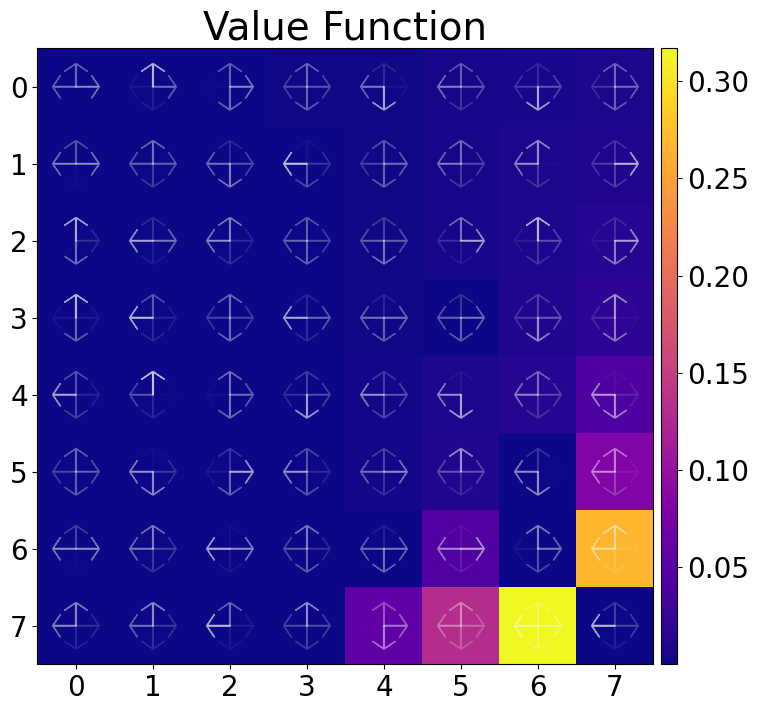

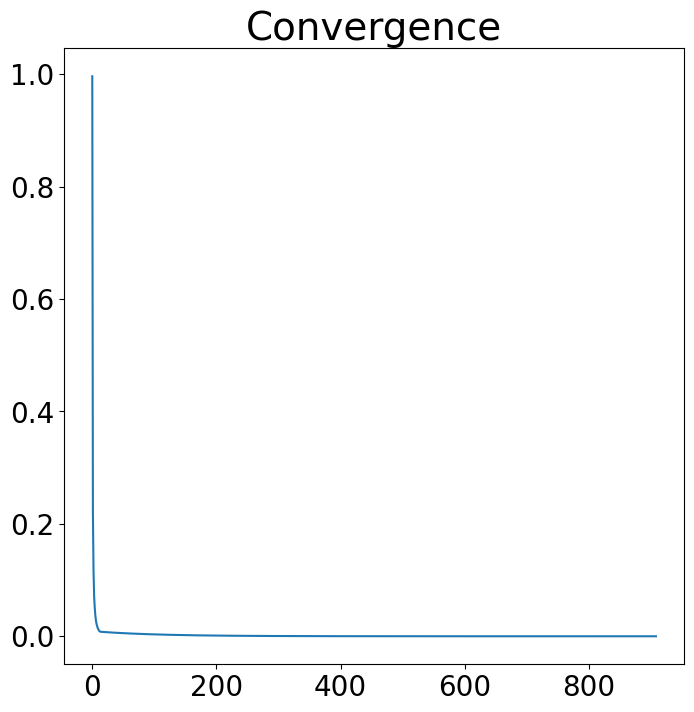

In [ ]:
def policy_evaluation(env, policy, gamma = 0.99, epsilon = 1e-6):
    '''
    env : gym environment
    gamma : discount factor
    epsilon : terminal condition
    '''

    # Extract environment information
    obs_space = env.observation_space
    n_state = obs_space.n
    P = env.unwrapped.P

    # Random initial
    v = np.random.uniform(size=(n_state,1))
    error_list = []

    while True:
        v_prime = np.zeros((n_state,))

        # TODO
        # For all states s, update v(s)
        for s in env.unwrapped.P.keys(): # For all states s, update v(s)
            for a in env.unwrapped.P[s].keys(): # For all actions a
                for prob, next_s, reward, done in env.unwrapped.P[s][a]: # For all possible transitions (s,a,s')
                    v_prime[s] = v_prime[s] + policy[s][a]*prob*(reward+gamma*v[next_s])

        dist = np.max(np.abs(v-v_prime))
        error_list.append(dist)
        v = v_prime
        if dist < epsilon:
            break
    return v, error_list

def plot_results(policy, value, fig_title="Value Function"):
    fig= plt.figure(figsize=(8,8))
    ax = plt.axes()
    ax.set_xticks(list(range(8)))
    ax.set_yticks(list(range(8)))
    im = plt.imshow(np.reshape(value,(8,8)),cmap='plasma')
    plt.title(fig_title,fontdict={'fontsize':28})
    arr_len = 0.2
    for i in range(8):
        for j in range(8):
            s = i*8+j
            if policy[s][0]> 0:
                plt.arrow(j,i,-arr_len,0,color="w",alpha=policy[s][0],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
            if policy[s][1]> 0:
                plt.arrow(j,i,0,arr_len,color="w",alpha=policy[s][1],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
            if policy[s][2]> 0:
                plt.arrow(j,i,arr_len,0,color="w",alpha=policy[s][2],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
            if policy[s][3]> 0:
                plt.arrow(j,i,0,-arr_len,color="w",alpha=policy[s][3],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
    cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
    cbar = plt.colorbar(im, cax=cax)
    cbar.ax.tick_params(labelsize=20)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    plt.show()

def plot_errors(_error_list):
    fig= plt.figure(figsize=(8,8))
    ax = plt.axes()

    plt.title("Convergence",fontdict={'fontsize':28})
    plt.plot(_error_list)

    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    plt.show()

if __name__ == '__main__':
    print('Policy evaluation for random policy\n')
    value, error_list = policy_evaluation(env, policy, gamma = 0.99, epsilon = 1e-6)
    print('Value of current policy:')
    plot_results(policy, value)
    plot_errors(error_list)

### Policy Improvement

In this step, we update policy distribution using the value function computed by policy evaluation.
A new policy distribution is updated greedly as follows:

$Q_{\pi_{i}}(s,a)=\sum_{s'}[r(s,a,s')+\gamma V_{\pi_{i}}(s')]P(s'|s,a)$

$\pi_{i+1} = \arg\max_{a} Q_{\pi_{i}}(s,a)$

In [ ]:
import numpy as np

def policy_improvement(env, v, gamma=0.99):
    obs_space = env.observation_space
    n_state = obs_space.n
    act_space = env.action_space
    n_act = act_space.n
    P = env.unwrapped.P
    q = np.zeros((n_state, n_act))

    # Calculate q-values for each state-action pair
    for s in range(n_state):
        for a in range(n_act):
            for prob, next_s, reward, done in P[s][a]:
                q[s, a] += prob * (reward + gamma * v[next_s])

    # Greedy policy improvement
    policy = np.zeros((n_state, n_act))
    best_actions = np.argmax(q, axis=1)
    for s in range(n_state):
        policy[s, best_actions[s]] = 1.0

    return policy


Policy improvement

Improved Policy:


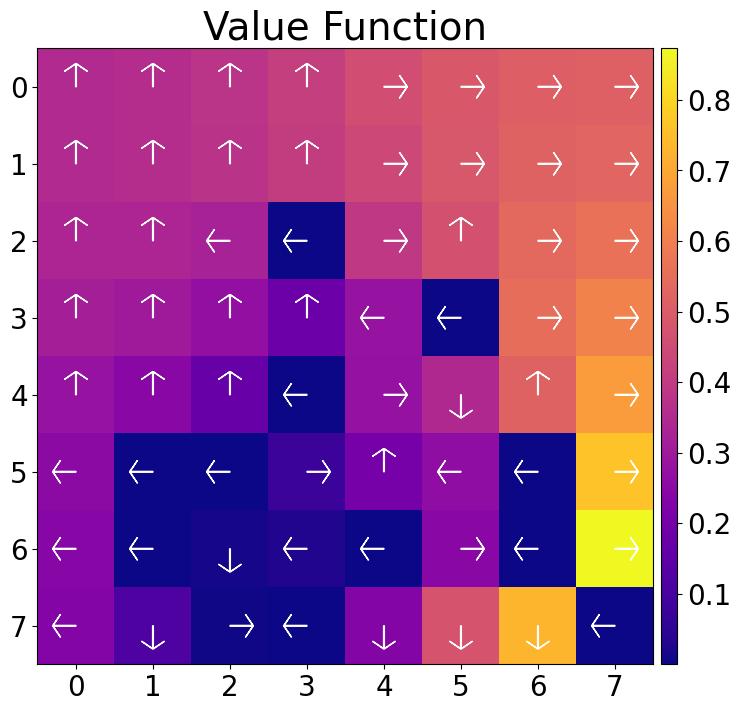

In [ ]:
def policy_improvement(env, v, gamma = 0.99):
    obs_space = env.observation_space
    n_state = obs_space.n
    act_space = env.action_space
    n_act = act_space.n
    P = env.unwrapped.P
    q = np.zeros((n_state,n_act))

    # TODO
    # For all states s,
    # For all actions a
    # Compute q[s,a] from v[s'], keep adding r[s,a,s']+gamma*v[s'] for all transition


    # For all states s, update v(s)
    for s in env.unwrapped.P.keys():
        # For all actions a
        for a in env.unwrapped.P[s].keys():
            # For all possible transitions (s,a,s')
            for prob, next_s, reward, done in env.unwrapped.P[s][a]:
                q[s][a] = q[s][a] + prob * (reward+gamma*v[next_s])

    # Greedy policy improvement
    policy = np.zeros((n_state,n_act))
    policy[np.arange(n_state),np.argmax(q,axis=1)] = 1
    return policy

if __name__ == '__main__':
    print('Policy improvement\n')
    imp_policy = policy_improvement(env, value)
    imp_value, error_list = policy_evaluation(env, imp_policy, gamma = 0.99, epsilon = 1e-6)
    print('Improved Policy:')
    plot_results(imp_policy, imp_value)

### Policy Iteration

Policy iteration algorithm consists of four steps:

(1) Initial policy distribution is randomly initialized

(2) Value function for current policy is computed by policy evaluation

(3) Policy distribution is greedily updated using value function from (2)

(4) If policy distribution doesn't change, then stop. Othrewise, repeat (1) ~ (3)

Policy Iteration
Computation Time : 33.52


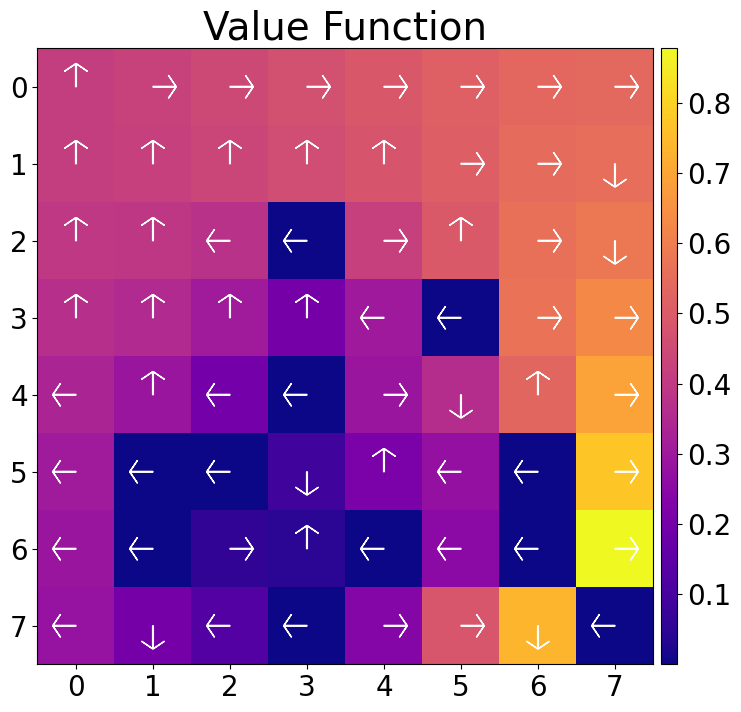

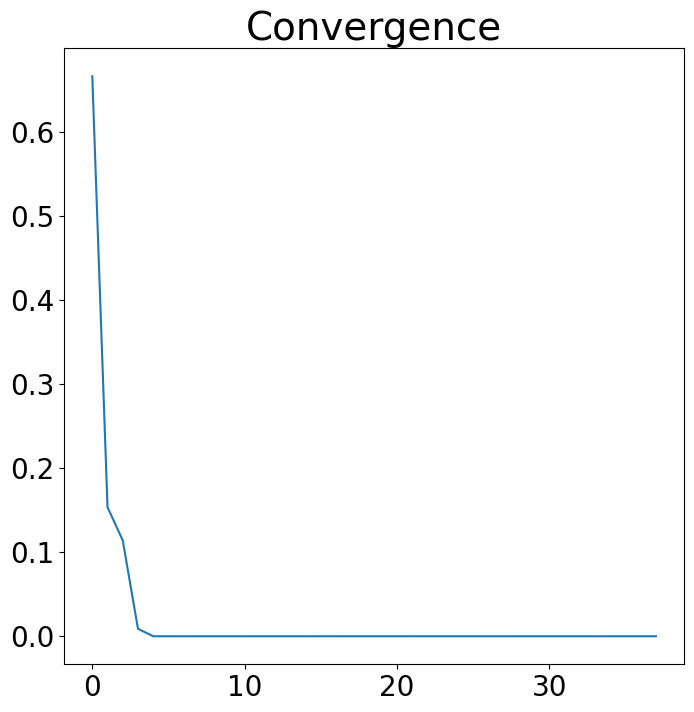

In [ ]:
def policy_iteration(env):
    policy = np.random.uniform(size=(n_state,n_act))
    policy = policy/np.sum(policy,axis=1,keepdims=True)
    value, _ = policy_evaluation(env, policy) # Evaluate value of current policy

    error_list = []
    while True:
        # TODO
        # Find greedy policy
        policy_prime = policy_improvement(env, value)
        # Evaluate value of current policy
        value_prime, _ = policy_evaluation(env, policy_prime)

        dist = np.max(np.abs(value-value_prime))
        error_list.append(dist)

        # TODO
        # If policy doesn't change, stop
        if (policy == policy_prime).all():
            break

        # TODO
        # update new policy
        policy = policy_prime
        # update new value
        value = value_prime

    return policy, value, error_list

if __name__=='__main__':
    print("Policy Iteration")
    import time
    start = time.time()
    policy, value, error_list = policy_iteration(env)
    print("Computation Time : %.2f"%(time.time() - start))
    plot_results(policy, value)
    plot_errors(error_list)

### Run optimal policy

In [ ]:
import cv2
from matplotlib import animation
from IPython.display import display, HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim.to_jshtml())
def display_frames_as_gif(frames):
    patch = plt.imshow(frames[0])
    plt.axis('off')
    def animate(i):
        patch.set_data(frames[i])
    anim = animation.FuncAnimation(
        plt.gcf(),animate,frames=len(frames),interval=100)
    display(display_animation(anim))

# Loop
obs =env.reset()
frames = []
for t in range(100):
    frame = env.render()[0]
    texted_frame = cv2.putText(
        img=np.copy(frame),text='tick:%d'%(t),org=(100,100),
        fontFace=3,fontScale=2,color=(0,0,255),thickness=3)
    frames.append(texted_frame)
    action = np.random.choice(n_act, 1, p=policy[obs])[0]
    obs, reward, done, info = env.step(action) # step
    if done: break
env.close()
print ("[%d] frames."%(len(frames)))
display_frames_as_gif(frames)

Output hidden; open in https://colab.research.google.com to view.

# Numpy Version

Better implementation using numpy functions

This is computationally faster than above implementation

For loop is replaced with numpy native functions, such as broadcasting (or 'np.tile') and 'np.sum'

Policy Iteration Compact
Computation Time : 4.34



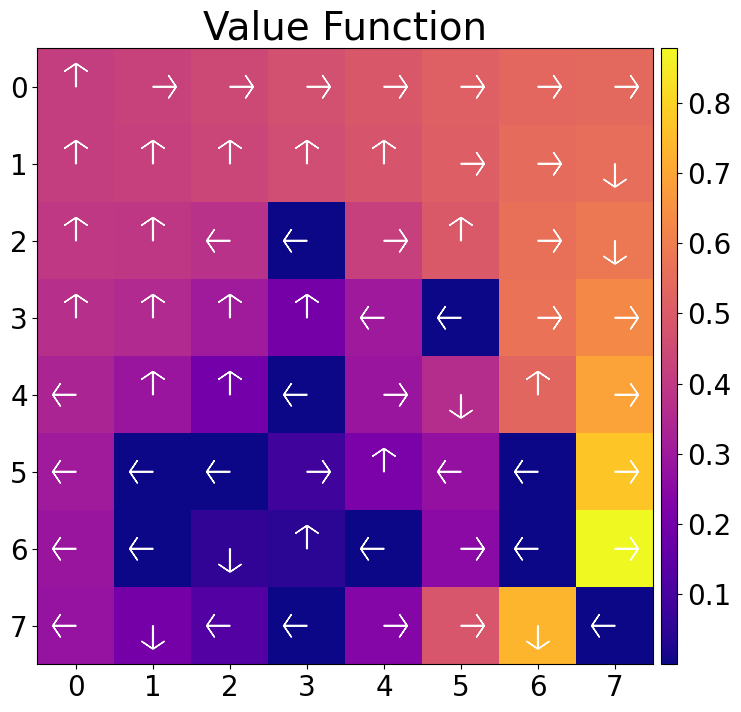

In [ ]:
def policy_evaluation_np(env, P, r, policy, gamma = 0.99, epsilon = 1e-6):
    """
    Performs policy evaluation using a vectorized implementation with NumPy.

    Args:
        env: the gym environment
        P: transition probability tensor of shape (n_state, n_act, n_state)
        r: reward tensor of shape (n_state, n_act, n_state)
        policy: policy matrix of shape (n_state, n_act)
        gamma: discount factor (default: 0.99)
        epsilon: convergence threshold (default: 1e-6)

    Returns:
        v: value function array of shape (n_state,)
    """

    # Extract environment information
    obs_space = env.observation_space
    act_space = env.action_space
    n_state = obs_space.n
    n_act = act_space.n

    # Random initial
    v = np.random.uniform(size=(n_state,))

    while True:

        # TODO
        # Compute q-values for the current value function `v`
        # q(s, a) = sum_{s'} P(s'|s,a) * [r(s,a,s') + gamma * v(s')]
        #
        # Shapes involved:
        #   - v[np.newaxis, np.newaxis, :] reshapes v into (1, 1, n_state)
        #   - r has shape (n_state, n_act, n_state)
        #   - P has shape (n_state, n_act, n_state)
        # So (r + gamma*v) * P gives the expected return for each (s,a)
        # Summing over axis=2 gives q(s,a) for all states and actions
        q = np.sum((r + gamma * v[np.newaxis, np.newaxis, :]) * P, axis=2)
        v_prime = np.sum(policy * q, axis=1)

        dist = np.max(np.abs(v-v_prime))
        v = v_prime
        if dist < epsilon:
            break
    return v

def policy_improvement_np(env, P, r, v, gamma = 0.99):
    obs_space = env.observation_space
    act_space = env.action_space
    n_state = obs_space.n
    n_act = act_space.n

    # TODO
    # For each state-action pair (s, a), compute the expected return:
    #     q(s, a) = sum_{s'} P(s'|s,a) * [r(s,a,s') + gamma * v(s')]
    #
    # v[np.newaxis, np.newaxis, :] has shape (1, 1, n_state)
    # r and P both have shape (n_state, n_act, n_state)
    # The result of the multiplication and summation gives q(s, a) for all (s, a)
    q = np.sum((r + gamma * v[np.newaxis, np.newaxis, :]) * P, axis=2)

    policy = np.zeros((n_state,n_act))
    policy[np.arange(n_state),np.argmax(q,axis=1)] = 1

    return policy

def policy_iteration_np(env):
    policy = np.random.uniform(size=(n_state,n_act))
    policy = policy/np.sum(policy,axis=1,keepdims=True)
    P = np.zeros((n_state,n_act,n_state))
    r = np.zeros((n_state,n_act,n_state))
    for s in env.unwrapped.P.keys(): # For all states s, update v(s)
        for a in env.unwrapped.P[s].keys(): # For all actions a
            for prob, next_s, reward, done in env.unwrapped.P[s][a]: # For all possible transitions (s,a,s')
                P[s][a][next_s] += prob
                r[s][a][next_s] = reward

    value = policy_evaluation_np(env, P, r, policy) # Evaluate value of current policy

    while True:
        policy_prime = policy_improvement_np(env, P, r, value) # Find greedy policy
        value_prime = policy_evaluation_np(env, P, r, policy_prime) # Evaluate value of current policy

        dist = np.max(np.abs(value-value_prime))
        error_list.append(dist)
        if (policy == policy_prime).all(): # If policy doesn't change, stop
            break
        policy = policy_prime # update new policy
        value = value_prime
    return policy, value

if __name__=='__main__':
    print("Policy Iteration Compact")
    import time
    start = time.time()
    policy, value = policy_iteration_np(env)
    print("Computation Time : %.2f"%(time.time() - start))
    print('')
    plot_results(policy, value)

In [ ]:
# Loop
obs =env.reset()
frames = []
for t in range(100):
    frame = env.render()[0]
    texted_frame = cv2.putText(
        img=np.copy(frame),text='tick:%d'%(t),org=(100,100),
        fontFace=3,fontScale=2,color=(0,0,255),thickness=3)
    frames.append(texted_frame)
    action = np.random.choice(n_act, 1, p=policy[obs])[0]
    obs, reward, done, info = env.step(action) # step
    if done: break
env.close()
print ("[%d] frames."%(len(frames)))
display_frames_as_gif(frames)

Output hidden; open in https://colab.research.google.com to view.